Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Weijie Yuan"
COLLABORATORS = "N/A"

# Homework 1: Food Safety 
## Cleaning and Exploring Data with Pandas
## Due Date: Thursday 9/13, 11:59 PM
## Course Policies

Here are some important course policies. These are also located at
http://www.ds100.org/fa18/.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

## This assignment
<img src="scoreCard.jpg" width=400>

In this homework, you will investigate restaurant food safety scores for restaurants in San Francisco. Above is a sample score card for a restaurant. The scores and violation information have been made available by the San Francisco Department of Public Health and we have made these data available to you via the DS 100 repository. The main goal for this assignment is to understand how restaurants are scored. We will walk through the various steps of exploratory data analysis to do this. We will provide comments and insights along the way to give you a sense of how we arrive at each discovery and what next steps it leads to.

As we clean and explore these data, you will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Exploring characteristics and distributions of individual variables

## Score breakdown
Question | Points
--- | ---
1a | 1
1b | 0
1c | 0
1d | 3
1e | 1
2a | 1
2b | 2
3a | 2
3b | 0
3c | 2
3d | 1
3e | 1
4a | 2
4b | 3
5a | 1
5b | 1
5c | 1
6a | 2
6b | 3
6c | 3
7a | 2
7b | 2
7c | 6
7d | 2
7e | 3
Total | 45

To start the assignment, run the cell below to set up some imports and the automatic tests that we will need for this assignment:

In many of these assignments (and your future adventures as a data scientist) you will use `os`, `zipfile`, `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.  

1. Import each of these libraries `as` their commonly used abbreviations (e.g., `pd`, `np`, `plt`, and `sns`).  
1. Don't forget to include `%matplotlib inline` which enables [inline matploblib plots](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib). 
1. Add the line `sns.set()` to make your plots look nicer.

In [2]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
import sys

assert 'zipfile'in sys.modules
assert 'pandas'in sys.modules and pd
assert 'numpy'in sys.modules and np
assert 'matplotlib'in sys.modules and plt
assert 'seaborn'in sys.modules and sns

## Downloading the data

For this assignment, we need this data file: http://www.ds100.org/fa18/assets/datasets/hw2-SFBusinesses.zip

We could write a few lines of code that are built to download this specific data file, but it's a better idea to have a general function that we can reuse for all of our assignments. Since this class isn't really about the nuances of the Python file system libraries, we've provided a function for you in ds100_utils.py called `fetch_and_cache` that can download files from the internet.

This function has the following arguments:
- data_url: the web address to download
- file: the file in which to save the results
- data_dir: (default="data") the location to save the data
- force: if true the file is always re-downloaded 

The way this function works is that it checks to see if `data_dir/file` already exists. If it does not exist already or if `force=True`, the file at `data_url` is downloaded and placed at `data_dir/file`. The process of storing a data file for reuse later is called caching. If `data_dir/file` already and exists `force=False`, nothing is downloaded, and instead a message is printed letting you know the date of the cached file.

The function returns a `pathlib.Path` object representing the file. A `pathlib.Path` is an object that stores filepaths, e.g. `~/Dropbox/ds100/horses.txt`. 

The code below uses `ds100_utils.py` to download the data from the following URL: http://www.ds100.org/fa18/assets/datasets/hw2-SFBusinesses.zip

In [4]:
import ds100_utils
source_data_url = 'http://www.ds100.org/fa18/assets/datasets/hw2-SFBusinesses.zip'
target_file_name = 'data.zip'
data_dir = '.'

# Change the force=False -> force=True in case you need to force redownload the data
dest_path = ds100_utils.fetch_and_cache(data_url=source_data_url, data_dir=data_dir, file=target_file_name, force=False)

Using cached version that was downloaded (UTC): Tue Sep  4 16:56:11 2018


After running the code, if you look at the directory containing hw1.ipynb, you should see data.zip.

---
## 1: Loading Food Safety Data

Alright, great, now we have `data.zip`. We don't have any specific questions yet, so let's focus on understanding the structure of the data. Recall this involves answering questions such as 

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

Let's start by looking at the contents of the zip file. We could in theory do this by manually opening up the zip file on our computers or using a shell command like `!unzip`, but on this homework we're going to do almost everything in Python for maximum portability and automation.

**Goal**: Fill in the code below so that `my_zip` is a `Zipfile.zipfile` object corresponding to the downloaded zip file, and so that `list_names` contains a list of the names of all files inside the downloaded zip file.

Creating a `zipfile.Zipfile` object is a good start (the [Python docs](https://docs.python.org/3/library/zipfile.html) have further details). You might also look back at the code from the case study from lecture 2, [02-case-study.ipynb](http://www.ds100.org/fa18/assets/lectures/lec02/02-case-study.nbconvert.html). It's OK to copy and paste code from the 02-case-study file, though you might get more out of this exercise if you type out an answer.

### Question 1a: Looking Inside and Extracting the Zip Files

In [5]:
# Fill in the list_files variable with a list of all the names of the files in the zip file
my_zip = zipfile.ZipFile(target_file_name, mode='r')
list_names = my_zip.namelist()

The cell below will test that your code is correct.

In [6]:
assert isinstance(my_zip, zipfile.ZipFile)
assert isinstance(list_names, list)
assert all([isinstance(file, str) for file in list_names]) 


In your answer above, if you see something like `zipfile.Zipfile('data.zip'...`, we suggest changing it to read `zipfile.Zipfile(dest_path...` or alternately `zipfile.Zipfile(target_file_name...`. In general, we **strongly suggest having your filenames hard coded ONLY ONCE** in any given iPython notebook. It is very dangerous to hard code things twice, because if you change one but forget to change the other, you can end up with very hard to find bugs.

Now display the files' names and their sizes.

If you're not sure how to proceed, read about the attributes of a `ZipFile` object in the Python docs linked above.

In [7]:
[[f.filename, f.file_size] for f in my_zip.filelist]

[['violations.csv', 3726206],
 ['businesses.csv', 660231],
 ['inspections.csv', 466106],
 ['legend.csv', 120]]

Often when working with zipped data, we'll never unzip the actual zipfile. This saves space on our local computer. However, for this HW, the files are small, so we're just going to unzip everything. This has the added benefit that you can look inside the csv files using a text editor, which might be handy for more deeply understanding what's going on. The cell below will unzip the csv files into a subdirectory called "data". Try running the code below.

In [8]:
from pathlib import Path
data_dir = Path('data')
my_zip.extractall(data_dir)

When you ran the code above, nothing gets printed. However, this code should have created a folder called "data", and in it should be the four CSV files. Assuming you're using Datahub, use your web browser to verify that these files were created, and try to open up `legend.csv` to see what's inside. You should see something that looks like:

    "Minimum_Score","Maximum_Score","Description"
    0,70,"Poor"
    71,85,"Needs Improvement"
    86,90,"Adequate"
    91,100,"Good"

### Question 1b: Programatically Looking Inside the Files

What we see when we opened the file above is good news! It looks like this file is indeed a csv file. Let's check the other three files. This time, rather than opening up the files manually, let's use Python to print out the first 5 lines of each. The `ds100_utils` library has a method called `head` that will allow you to retrieve the first N lines of a file as a list. For example `ds100_utils.head('data/legend.csv', 5)` will return the first 5 lines of "data/legend.csv". Try using this function to print out the first 5 lines of all four files that we just extracted from the zipfile.

In [9]:
for file in my_zip.namelist():
    print(ds100_utils.head(data_dir/file, 5))

['"business_id","date","description"\n', '19,"20171211","Inadequate food safety knowledge or lack of certified food safety manager"\n', '19,"20171211","Unapproved or unmaintained equipment or utensils"\n', '19,"20160513","Unapproved or unmaintained equipment or utensils  [ date violation corrected: 12/11/2017 ]"\n', '19,"20160513","Unclean or degraded floors walls or ceilings  [ date violation corrected: 12/11/2017 ]"\n']
['"business_id","name","address","city","state","postal_code","latitude","longitude","phone_number"\n', '19,"NRGIZE LIFESTYLE CAFE","1200 VAN NESS AVE, 3RD FLOOR","San Francisco","CA","94109","37.786848","-122.421547","+14157763262"\n', '24,"OMNI S.F. HOTEL - 2ND FLOOR PANTRY","500 CALIFORNIA ST, 2ND  FLOOR","San Francisco","CA","94104","37.792888","-122.403135","+14156779494"\n', '31,"NORMAN\'S ICE CREAM AND FREEZES","2801 LEAVENWORTH ST ","San Francisco","CA","94133","37.807155","-122.419004",""\n', '45,"CHARLIE\'S DELI CAFE","3202 FOLSOM ST ","San Francisco","CA","

### Question 1c: Reading in the Files

Based on the above information, let's attempt to load `businesses.csv`, `inspections.csv`, and `violations.csv` into pandas data frames with the following names: `bus`, `ins`, and `vio` respectively.

*Note:* Because of character encoding issues one of the files (`bus`) will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`. 

In [10]:
# path to directory containing data
dsDir = Path('data')

# Make sure to use these names
bus = pd.read_csv(dsDir/'businesses.csv',encoding='ISO-8859-1')
ins = pd.read_csv(dsDir/'inspections.csv')
vio = pd.read_csv(dsDir/'violations.csv')

Now that you've read in the files, let's try some `pd.DataFrame` methods.
Use the `DataFrame.head` command to show the top few lines of the `bus`, `ins`, and `vio` dataframes.

In [11]:
bus.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN


In [12]:
ins.head(3)

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine


In [13]:
vio.head(3)

,business_id,date,description
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...


The `DataFrame.describe` method can also be handy for computing summaries of various statistics of our dataframes. Try it out with each of our 3 dataframes.

In [14]:
bus.describe()

,business_id,latitude,longitude
count,6406.000000,3270.000000,3270.000000
mean,53058.248049,37.773662,-122.425791
std,34928.238762,0.022910,0.027762
min,19.000000,37.668824,-122.510896
25%,7405.500000,37.760487,-122.436844
50%,68294.500000,37.780435,-122.418855
75%,83446.500000,37.789951,-122.406609
max,94574.000000,37.824494,-122.368257


In [15]:
ins.describe()

,business_id,score,date
count,14222.000000,14222.000000,1.422200e+04
mean,45138.752637,90.697370,2.016242e+07
std,34497.913056,8.088705,8.082778e+03
min,19.000000,48.000000,2.015013e+07
25%,5634.000000,86.000000,2.016021e+07
50%,61462.000000,92.000000,2.016091e+07
75%,78074.000000,96.000000,2.017061e+07
max,94231.000000,100.000000,2.018012e+07


In [16]:
vio.describe()

,business_id,date
count,39042.000000,3.904200e+04
mean,45674.440244,2.016283e+07
std,34172.433276,7.874679e+03
min,19.000000,2.015013e+07
25%,4959.000000,2.016031e+07
50%,62060.000000,2.016092e+07
75%,77681.000000,2.017063e+07
max,94231.000000,2.018012e+07


### Question 1d: Verify Your Files were Read Correctly

Now, we perform some sanity checks for you to verify that you loaded the data with the right structure. Run the following cells to load some basic utilities (you do not need to change these at all):

First, we check the basic structure of the data frames you created:

In [17]:
assert all(bus.columns == ['business_id', 'name', 'address', 'city', 'state', 'postal_code',
                           'latitude', 'longitude', 'phone_number'])
assert 6400 <= len(bus) <= 6420

assert all(ins.columns == ['business_id', 'score', 'date', 'type'])
assert 14210 <= len(ins) <= 14250

assert all(vio.columns == ['business_id', 'date', 'description'])
assert 39020 <= len(vio) <= 39080

Next we'll check that the statistics match what we expect. The following are hard-coded statistical summaries of the correct data. .

In [18]:
bus_summary = pd.DataFrame(**{'columns': ['business_id', 'latitude', 'longitude'],
 'data': {'business_id': {'50%': 68294.5, 'max': 94574.0, 'min': 19.0},
  'latitude': {'50%': 37.780435, 'max': 37.824494, 'min': 37.668824},
  'longitude': {'50%': -122.41885450000001,
   'max': -122.368257,
   'min': -122.510896}},
 'index': ['min', '50%', 'max']})

ins_summary = pd.DataFrame(**{'columns': ['business_id', 'score'],
 'data': {'business_id': {'50%': 61462.0, 'max': 94231.0, 'min': 19.0},
  'score': {'50%': 92.0, 'max': 100.0, 'min': 48.0}},
 'index': ['min', '50%', 'max']})

vio_summary = pd.DataFrame(**{'columns': ['business_id'],
 'data': {'business_id': {'50%': 62060.0, 'max': 94231.0, 'min': 19.0}},
 'index': ['min', '50%', 'max']})

from IPython.display import display

print('What we expect from your Businesses dataframe:')
display(bus_summary)
print('What we expect from your Inspections dataframe:')
display(ins_summary)
print('What we expect from your Violations dataframe:')
display(vio_summary)

What we expect from your Businesses dataframe:


,business_id,latitude,longitude
min,19.0,37.668824,-122.510896
50%,68294.5,37.780435,-122.418855
max,94574.0,37.824494,-122.368257


What we expect from your Inspections dataframe:


,business_id,score
min,19.0,48.0
50%,61462.0,92.0
max,94231.0,100.0


What we expect from your Violations dataframe:


,business_id
min,19.0
50%,62060.0
max,94231.0


The code below defines a testing function that we'll use to verify that your data has the same statistics as what we expect. Run these cells to define the function. The `df_allclose` function has this name because we are verifying that all of the statistics for your dataframe are close to the expected values. Why not `df_allequal`? It's a bad idea in almost all cases to compare two floating point values like 37.780435, as rounding error can cause spurious failures.

Do not delete the empty cell below!

In [19]:
"""Run this cell to load this utility comparison function that we will use in various
tests below (both tests you can see and those we run internally for grading).

Do not modify the function in any way.
"""

def df_allclose(actual, desired, columns=None, rtol=5e-2):
    """Compare selected columns of two dataframes on a few summary statistics.
    
    Compute the min, median and max of the two dataframes on the given columns, and compare
    that they match numerically to the given relative tolerance.
    
    If they don't match, an AssertionError is raised (by `numpy.testing`).
    """
    import numpy.testing as npt
    
    # summary statistics to compare on
    stats = ['min', '50%', 'max']
    
    # For the desired values, we can provide a full DF with the same structure as
    # the actual data, or pre-computed summary statistics.
    # We assume a pre-computed summary was provided if columns is None. In that case, 
    # `desired` *must* have the same structure as the actual's summary
    if columns is None:
        des = desired
        columns = desired.columns
    else:
        des = desired[columns].describe().loc[stats]

    # Extract summary stats from actual DF
    act = actual[columns].describe().loc[stats]

    npt.assert_allclose(act, des, rtol)

Now let's run the automated tests. If your dataframes are correct, then the following cell will seem to do nothing, which is a good thing!

In [20]:
# These tests will raise an exception if your variables don't match numerically the correct
# answers in the main summary statistics shown above.
df_allclose(bus, bus_summary)
df_allclose(ins, ins_summary)
df_allclose(vio, vio_summary)

Do not edit the empty cell below. These are hidden tests!

### Question 1e: Identifying Issues with the Data

Use the `head` command on your three files again. This time, describe at least one potential problem with the data you see. Consider issues with missing values and bad data.  

In [21]:
q1e_answer = r"""

The variable "phone_number" in "bus" dataframe has a missing value in first five rows. And business_id should 
be regarded as qualitative variable instead of quantitative variable, so it is improper for id to have numeric
features.

"""
print(bus.head(5))
print(ins.head(5))
print(vio.head(5))

print(q1e_answer)

   business_id                                name  \
0           19               NRGIZE LIFESTYLE CAFE   
1           24  OMNI S.F. HOTEL - 2ND FLOOR PANTRY   
2           31      NORMAN'S ICE CREAM AND FREEZES   
3           45                 CHARLIE'S DELI CAFE   
4           48                          ART'S CAFE   

                         address           city state postal_code   latitude  \
0   1200 VAN NESS AVE, 3RD FLOOR  San Francisco    CA       94109  37.786848   
1  500 CALIFORNIA ST, 2ND  FLOOR  San Francisco    CA       94104  37.792888   
2           2801 LEAVENWORTH ST   San Francisco    CA       94133  37.807155   
3                3202 FOLSOM ST   San Francisco    CA       94110  37.747114   
4                 747 IRVING ST   San Francisco    CA       94122  37.764013   

    longitude  phone_number  
0 -122.421547  +14157763262  
1 -122.403135  +14156779494  
2 -122.419004           NaN  
3 -122.413641  +14156415051  
4 -122.465749  +14156657440  
   business_id

We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables indivdually. Let's begin with the businesses file, which has been read into the `bus` dataframe.

---
## 2: Examining the Business data

From its name alone, we expect the `businesses.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

**Important note: From now on, the local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

### Question 2a

Examining the entries in `bus`, is the `business_id` unique for each record? Your code should compute the answer, i.e. don't just hard code "True".

Hint: use `value_counts()` or `unique()` to determine if the `business_id` series has any duplicates.

In [22]:
is_business_id_unique = all([id for id in bus['business_id'].value_counts()==1])

In [23]:
assert is_business_id_unique

### Question 2b

With this information, you can address the question of granularity. Answer the questions below.

1. How many records are there?
1. What does each record represent (e.g., a store, a chain, a transaction)?  
1. What is the primary key?

Please write your answer in the `q2b_answer` variable. You may create new cells to run code as long as you don't delete the cell below.

In [24]:
# use this cell for scratch work
# consider using groupby or value_counts() on the 'name' or 'business_id' 
ans_1 = len(bus.groupby(['business_id']))
ans_2 = 'Each record represents a store.'
ans_3 = 'The primary key is business_id'

In [25]:
q2b_answer = "1. There are " +str(ans_1) +" records."+"\n2. "+ans_2 +"\n3. "+ans_3+"."
print(q2b_answer)

1. There are 6406 records.
2. Each record represents a store.
3. The primary key is business_id.


---
## 3: Zip code

Next, let's  explore some of the variables in the business table. We begin by examining the postal code.

### Question 3a

What kind of values are in the `postal code` column in the `bus` data frame?  
1. Are zip codes quantitative or qualitative? If qualitative, is it ordinal or nominal? 
1. How are the zip code values encoded in python: ints, floats, strings, booleans ...?

To answer the second question you might want to examine a particular entry using the Python `type` command.

In [26]:
type(bus['postal_code'][0])

str

In [27]:
# Use this cell for your explorations.
q3a_answer = """1. Zip codes are qualitative and it is normial.
2. Zip code values are encoded in python as string."""

print(q3a_answer)

1. Zip codes are qualitative and it is normial.
2. Zip code values are encoded in python as string.


### Question 3b

To explore the zip code values, it makes sense to examine counts, i.e., the number of records  that have the same zip code value. This is essentially answering the question: How many restaurants are in each zip code? 


In the cell below, create a series where the index is the postal code and the value is the number of businesses in that postal code. For example, in 94110 (hey that's my old zip code!), there should be 596 businesses. Your series should be in descending order, i.e. 94110 should be at the top. 

For this answer, use `groupby`, `size`, and `sort_values`.

In [28]:
zip_counts = bus.groupby('postal_code').size().sort_values(ascending = False)

Unless you know pandas well already, your answer probably has one subtle flaw in it: it fails to take into account businesses with missing zip codes. Unfortunately, missing data is just a reality when we're working with real data.

There are a couple of ways to include null postal codes in the zip_counts series above. One approach is to use `fillna`, which will replace all null (a.k.a. NaN) values with a string of our choosing. In the example below, I picked "?????". When you run the code below, you should see that there are 240 businesses with missing zip code.

In [29]:
zip_counts = bus.fillna("?????").groupby("postal_code").size().sort_values(ascending=False)
zip_counts.head(15)

postal_code
94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
?????    240
94105    232
94108    228
94114    223
94117    204
dtype: int64

An alternate approach is to use the DataFrame `value_counts` method with the optional argument `dropna=False`, which will ensure that null values are counted. In this case, the index will be `NaN` for the row corresponding to a null postal code.

In [30]:
bus["postal_code"].value_counts(dropna=False).sort_values(ascending = False).head(15)

94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
NaN      240
94105    232
94108    228
94114    223
94117    204
Name: postal_code, dtype: int64

Missing zip codes aren't our only problem. There is also some bad data where the postal code got messed up, e.g., there are 3 'Ca' and 3 'CA' values. Additionally, there are some extended postal codes that are 9 digits long, rather than the typical 5 digits.

Let's clean up the extended zip codes by dropping the digits beyond the first 5. Rather than deleting replacing the old values in the `postal_code` columnm, we'll instead create a new column called `postal_code_5`.

The reason we're making a new column is because it's typically good practice to keep the original values when we are manipulating data. This makes it easier to recover from mistakes, and also makes it more clear that we are not working with the original raw data.

In [31]:
# Run me
bus['postal_code_5'] = bus['postal_code'].str[:5]
bus

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122
5,54,RHODA GOLDMAN PLAZA,2180 POST ST,San Francisco,CA,94115,37.784626,-122.437734,+14153455060,94115
6,56,CAFE X + O,1799 CHURCH ST,San Francisco,CA,94131,37.742325,-122.426476,+14158263535,94131
7,58,OASIS GRILL,91 DRUMM ST,San Francisco,CA,94111,37.794483,-122.396584,+14158341942,94111
8,61,CHOWDERS,PIER 39 SPACE A3,San Francisco,CA,94133,37.808240,-122.410189,+14153914737,94133
9,66,STARBUCKS COFFEE,1800 IRVING ST,San Francisco,CA,94122,37.763578,-122.477461,+14152427970,94122


### Question 3c : A Closer Look at Missing Zip Codes

Let's look more closely at businesses with missing zip codes. We'll see that many zip codes are missing for a good reason. Examine the businesses with missing zipcode values.  Pay attention to their addresses.  Do you notice anything interesting? You might need to look at a bunch of entries, i.e. don't just look at the first five.

*Hint: You can use the series `isnull` method to create a binary array, which can then be used to show only rows of the dataframe that contain null values.*

In [32]:
# Use this cell for your explorations.
q3c_answer = r"""
The most addresses of businesses that have null post code are off the grid or approved private locations or approved locations."""
print(bus[bus['postal_code_5'].isnull()].groupby('address').size().sort_values(ascending = False).head(10))


print(q3c_answer)

address
 OFF THE GRID                                  69
 APPROVED PRIVATE LOCATIONS                     6
 APPROVED LOCATIONS                             4
VARIOUS LOCATIONS                               2
 JUSTIN HERMAN PLAZA                            2
428 11TH ST                                     2
 OTG                                            2
OFF THE GRID                                    2
 FRONT, BETWEEN CALIFORNIA & SACRAMENTO ST      1
 GOLDEN GATE PARK                               1
dtype: int64

The most addresses of businesses that have null post code are off the grid or approved private locations or approved locations.


### Question 3d: Incorrect Zip Codes

This dataset is supposed to be only about San Francisco, so let's set up a list of all San Francisco zip codes.

In [33]:
all_sf_zip_codes = ["94102", "94103", "94104", "94105", "94107", "94108", "94109", "94110", "94111", "94112", "94114", "94115", "94116", "94117", "94118", "94119", "94120", "94121", "94122", "94123", "94124", "94125", "94126", "94127", "94128", "94129", "94130", "94131", "94132", "94133", "94134", "94137", "94139", "94140", "94141", "94142", "94143", "94144", "94145", "94146", "94147", "94151", "94158", "94159", "94160", "94161", "94163", "94164", "94172", "94177", "94188"]

Set `weird_zip_code_businesses` equal to a new dataframe showing only rows corresponding to zip codes that are not valid AND not NaN. Use the `postal_code_5` field.

*Hint: The `~` operator inverts a boolean array. Use in conjunction with `isin`.*

*Hint: The `notnull` method can be used to form a useful boolean array for this problem.*



In [34]:
weird_zip_code_businesses = bus[~bus['postal_code_5'].isin(all_sf_zip_codes) & bus['postal_code_5'].notnull()]

In [35]:
weird_zip_code_businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.807878,-122.442499,+14153462628,941
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545
1373,5757,"RICO VENDING, INC",VARIOUS LOCATIONS,San Francisco,CA,94066,NaN,NaN,+14155836723,94066
2258,36547,EPIC ROASTHOUSE,PIER 26 EMBARARCADERO,San Francisco,CA,95105,37.788962,-122.387941,+14153699955,95105
2293,37167,INTERCONTINENTAL SAN FRANCISCO EMPLOYEE CAFETERIA,888 HOWARD ST 2ND FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2295,37169,INTERCONTINENTAL SAN FRANCISCO 4TH FL. KITCHEN,888 HOWARD ST 4TH FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2846,64540,LEO'S HOT DOGS,2301 MISSION ST,San Francisco,CA,CA,37.760054,-122.419166,+14152406434,CA
2852,64660,HAIGHT STREET MARKET,1530 HAIGHT ST,San Francisco,CA,92672,37.769957,-122.447533,+14152550643,92672
2857,64738,JAPACURRY,PUBLIC,San Francisco,CA,CA,37.777122,-122.419639,+14152444785,CA
2969,65856,BAMBOO ASIA,41 MONTGOMERY ST,San Francisco,CA,94101,37.774998,-122.418299,+14156246790,94101


If we were doing very serious data analysis, we might indivdually look up every one of these strange records. Let's focus on just two of them: zip codes 94545 and 94602. Use a search engine to identify what cities these zip codes appear in. Try to explain why you think these two zip codes appear in your dataframe. For the one with zip code 94602, try searching for the business name and locate its real address.

In [36]:
weird_zip_code_businesses[weird_zip_code_businesses['postal_code_5']=='94602']

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
5060,85459,ORBIT ROOM,1900 MARKET ST,San Francisco,CA,94602,NaN,NaN,+14153705584,94602


In [37]:
weird_zip_code_businesses[weird_zip_code_businesses['postal_code_5']=='94545']

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545


In [38]:
# Use this cell for your explorations.
q3d_answer = r"""
94545 - The real address of J & J Vending is 33500 Western Ave, Union City, CA 94587. And there is another J And Amp J Vending located at 2700 Mccone Avenue, Hayward, CA 94545. These two addresses and zip codes may be mixed up. 

94602 - The real address of Orbit Room is 1900 Market St, San Francisco, CA 94102. Its wrong zip code appeared to be recorded wrongly with only one different digit.
"""

print(q3d_answer)


94545 - The real address of J & J Vending is 33500 Western Ave, Union City, CA 94587. And there is another J And Amp J Vending located at 2700 Mccone Avenue, Hayward, CA 94545. These two addresses and zip codes may be mixed up. 

94602 - The real address of Orbit Room is 1900 Market St, San Francisco, CA 94102. Its wrong zip code appeared to be recorded wrongly with only one different digit.



### Question 3e

We often want to clean the data to improve our analysis. This cleaning might include changing values for a variable or dropping records.

Let's correct 94602 to the more likely value based on your analysis.  Let's modify the derived field `zip_code` using `bus['zip_code'].str.replace` to replace 94602 with the correct value based on this business's real address that you learn by using a search engine.

In [39]:
# WARNING: Be careful when uncommenting the line below, it will set the entire column to NaN unless you 
# put something to the right of the ellipses.
# bus['postal_code_5'] = ... 
bus['postal_code_5'] = bus['postal_code_5'].str.replace('94602','94102')

In [40]:
assert "94602" not in bus['postal_code_5']

---
## 4: Latitude and Longitude

Let's also consider latitude and longitude values and get a sense of how many are missing.

### Question 4a

How many businesses are missing longitude values?

*Hint: Use isnull.*

In [41]:
missing_latlongs = sum(bus['longitude'].isnull())

Do not delete the empty cell below!

As a somewhat contrived exercise in data manipulation, let's try to identify which zip codes are missing the most longitude values.

Throughout problems 4a and 4b, let's focus on only the "dense" zip codes of the city of San Francisco, listed below as `sf_dense_zip`.

In [42]:
sf_dense_zip = ["94102", "94103", "94104", "94105", "94107", "94108",
            "94109", "94110", "94111", "94112", "94114", "94115",
            "94116", "94117", "94118", "94121", "94122", "94123", 
            "94124", "94127", "94131", "94132", "94133", "94134"]

In the cell below, create a series where the index is `postal_code_5`, and the value is the number of businesses with missing longitudes in that zip code. Your series should be in descending order. Only businesses from `sf_dense_zip` should be included.

For example, 94110 should be at the top of the series, with the value 294.

*Hint: Start by making a new dataframe called `bus_sf` that only has businesses from `sf_dense_zip`.

*Hint: Create a custom function to compute the number of null entries in a series, and use this function with the `agg` method.*

In [43]:
bus_sf = bus[bus['postal_code_5'].isin(sf_dense_zip)]
num_missing_in_each_zip = bus_sf.groupby('postal_code_5')['longitude'].agg(lambda x: sum(x.isnull())).astype('int').sort_values(ascending =False)

In [44]:
num_missing_in_each_zip

postal_code_5
94110    294
94103    285
94107    275
94102    222
94109    171
94133    159
94122    132
94111    129
94105    127
94124    118
94118    117
94114    111
94108     98
94115     95
94117     86
94104     79
94112     77
94132     71
94123     68
94121     60
94116     42
94134     36
94127     30
94131     16
Name: longitude, dtype: int64

Do not edit the empty cell below.

### Question 4b

In question 4a, we counted the number of null values per zip code. Let's now count the proportion of null values.

Create a new dataframe of counts of the null and proportion of null values, storing the result in `bus_sf_latlong`. It should have an index called `postal_code_5` and should also have 3 columns:

1. `null count`: The number of missing values for the zip code.
2. `not null count`: The proportion of present values for the zip code.
3. `fraction null`: The fraction of values that are null for the zip code.

Your data frame should be sorted by the fraction null in descending order.

Recommended approach: Build three series with the appropriate names and data and then combine them into a dataframe. This will require some new syntax you may not have seen. You already have code from question 4a that computes the `null count` series.

To pursue this recommended approach, you might find these two functions useful:

* `rename`: Renames the values of a series.
* `pd.concat`: Can be used to combine a list of Series into a dataframe. Example: `pd.concat([s1, s2, s3], axis=1)` will combine series 1, 2, and 3 into a dataframe.

*Hint: You can use the divison operator to compute the ratio of two series.*

*Hint: The ~ operator can invert a binary array. Or alternately, the `notnull` method can be used to create a binary array from a series.*

*Note: An alternate approach is to create three aggregation functions as pass them in a list to the `agg` function.*

In [45]:
null_count = bus_sf.groupby('postal_code_5')['longitude'].agg(lambda x: sum(x.isnull())).astype('int').rename("null count")
not_null_count = bus_sf.groupby('postal_code_5')['longitude'].agg(lambda x: sum(x.notnull())).astype('int').rename("not null count")
fraction_missing = (null_count / (not_null_count+null_count)).rename('fraction null')
fraction_missing_df = pd.concat([null_count,not_null_count,fraction_missing],axis=1)
fraction_missing_df = fraction_missing_df.sort_values('fraction null',ascending=False)
fraction_missing_df

,null count,not null count,fraction null
postal_code_5,,,
94124,118,73,0.617801
94107,275,185,0.597826
94104,79,60,0.568345
94105,127,105,0.547414
94132,71,62,0.533835
94103,285,268,0.515371
94114,111,112,0.497758
94110,294,303,0.492462
94122,132,141,0.483516


Do not edit the empty cell below.

## Summary of the Business Data

Before we move on to explore the other data, let's take stock of what we have learned and the implications of our findings on future analysis. 

* We found that the business id is unique across records and so we may be able to use it as a key in joining tables. 
* We found that there are many errors with the zip codes. As a result, we may want to drop the records with zip codes outside of San Francisco or to treat them differently. For some of the bad values, we could take the time to look up the restaurant address online and fix these errors.   
* We found that there are a huge number of missing longitude (and latitude) values. Fixing would require a lot of work, but could in principle be automated for business with well formed addresses. 

---
## 5: Investigate the Inspection Data

Let's now turn to the inspection DataFrame. Earlier, we found that `ins` has 4 columns named `business_id`, `score`, `date` and `type`.  In this section, we determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

Let's start by looking again at the first 5 rows of `ins` to see what we're working with.

In [46]:
ins.head(5)

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


### Question 5a
From calling `head`, we know that each row in this table corresponds to the inspection of a single business. Let's get a sense of the total number of inspections conducted, as well as the total number of unique businesses that occur in the dataset.

In [47]:
# The number of rows in ins
rows_in_table = len(ins)

# The number of unique business IDs in ins.
unique_ins_ids = len(ins['business_id'].unique())

Do not delete the empty cell below!

As you should have seen above, we have an average of roughly 3 inspections per business.

### Question 5b

Next, we examine the Series in the `ins` dataframe called `type`. From examining the first few rows of `ins`, we see that `type` is a string and one of its values is 'routine', presumably for a routine inspection. What values does `type` take on? How many occurrences of each value is in the DataFrame? What are the implications for further analysis? For this problem, you need only fill in the string with a description; there's no specific dataframe or series that you need to create.

In [48]:
ins.groupby('type').size()

type
complaint        1
routine      14221
dtype: int64

In [49]:
q5b_answer = r"""
Series "type" only takes on "complaint" with 1 occurrences and "routine" with 14221 occurrences.
"""
print(q5b_answer)


Series "type" only takes on "complaint" with 1 occurrences and "routine" with 14221 occurrences.



### Question 5c

In this question, we're going to try to figure out what years the data spans. Unfortunately, the dates in our file are formatted as strings such as `20160503`, which are a little tricky to interpret. The ideal solution for this problem is to modify our dates so that they are in an appropriate format for analysis. 

In the cell below, we attempt to add a new column to `ins` called `new_date` which contains the `date` stored as a datetime object. This calls the `pd.to_datetime` method, which converts a series of string representations of dates (and/or times) to a series containing a datetime object.

In [50]:
ins['new_date'] = pd.to_datetime(ins['date'])
ins.head(5)

,business_id,score,date,type,new_date
0,19,94,20160513,routine,1970-01-01 00:00:00.020160513
1,19,94,20171211,routine,1970-01-01 00:00:00.020171211
2,24,98,20171101,routine,1970-01-01 00:00:00.020171101
3,24,98,20161005,routine,1970-01-01 00:00:00.020161005
4,24,96,20160311,routine,1970-01-01 00:00:00.020160311


As you'll see, the resulting `new_date` column doesn't make any sense. This is because the default behavior of the `to_datetime()` method does not properly process the passed string. We can fix this by telling `to_datetime` how to do its job by providing a format string.

In [51]:
ins['new_date'] = pd.to_datetime(ins['date'], format='%Y%m%d')
ins.head(5)

,business_id,score,date,type,new_date
0,19,94,20160513,routine,2016-05-13
1,19,94,20171211,routine,2017-12-11
2,24,98,20171101,routine,2017-11-01
3,24,98,20161005,routine,2016-10-05
4,24,96,20160311,routine,2016-03-11


This is still not ideal for our analysis, so we'll add one more column that is just equal to the year by using the `dt.year` property of the new series we just created.

In [52]:
ins['year'] = ins['new_date'].dt.year
ins.head(5)

,business_id,score,date,type,new_date,year
0,19,94,20160513,routine,2016-05-13,2016
1,19,94,20171211,routine,2017-12-11,2017
2,24,98,20171101,routine,2017-11-01,2017
3,24,98,20161005,routine,2016-10-05,2016
4,24,96,20160311,routine,2016-03-11,2016


Now that we have this handy `year` column, we can try to understand our data better.

What range of years is covered in this data set? Are there roughly the same number of inspections each year? Provide your answer in text only.

In [53]:
ins.groupby('year').size()

year
2015    3305
2016    5443
2017    5166
2018     308
dtype: int64

In [54]:
q5c_answer = r"""
The range of years from 2015-2018 is covered in this data set and there are not roughly the same number of inspections each year. 2015 has 3305 inspections, while 2016, 2017, 2018 has 5443, 5166, 308 inspections respectively.
"""
print(q5c_answer)


The range of years from 2015-2018 is covered in this data set and there are not roughly the same number of inspections each year. 2015 has 3305 inspections, while 2016, 2017, 2018 has 5443, 5166, 308 inspections respectively.



---
## 6: Explore inspection score

### Question 6a
Let's look at the distribution of scores. As we saw before when we called `head` on this data, inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. Find the counts of the number of inspections for each score. Specifically, create a series in `scoreCts` where the index is the score and the value is the number of times that score was given.

Then make a bar plot of these counts. It should look like the image below. It does not need to look exactly the same, but it should be fairly close.

<img src="hist.png" width=400>


<Container object of 47 artists>

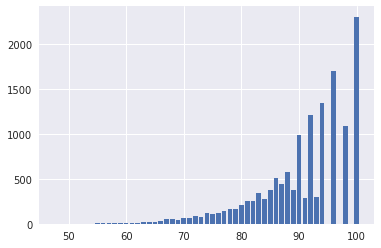

In [55]:
scoreCts = ins.groupby('score').size()
x = scoreCts.index
y = scoreCts.values
plt.bar(x,y)

### Question 6b

Describe the qualities of the distribution of the inspections scores based on your bar plot. Consider the mode(s), symmetry, tails, gaps, and anamolous values. Are there any unusual features of this distribution? What do your observations imply about the scores?

In [56]:
q6b_answer = r"""
The mode is 100. And the distribution of the inspections scores is asymmetry including more high score and few low score. It implies that people tend to give higher score if the experience can be acceptable.

The tails including some extreme low scores like 55, 57 and so on. They maybe caused by some extrme unhappy experience of limited customers.

The score gaps happen a lot extremely at 91, 93. They maybe caused by preference to certain even scores like 90, 92, 94, 96 because they are perfectly round or even numbers.

Anomalous values are mostly extreme low scores caused by review in bad faith or extreme horrible experience of some customers.
"""
print(q6b_answer)


The mode is 100. And the distribution of the inspections scores is asymmetry including more high score and few low score. It implies that people tend to give higher score if the experience can be acceptable.

The tails including some extreme low scores like 55, 57 and so on. They maybe caused by some extrme unhappy experience of limited customers.

The score gaps happen a lot extremely at 91, 93. They maybe caused by preference to certain even scores like 90, 92, 94, 96 because they are perfectly round or even numbers.

Anomalous values are mostly extreme low scores caused by review in bad faith or extreme horrible experience of some customers.



### Question 6c

Let's figure out which restaurants had the worst scores ever. Let's start by creating a new dataframe called `ins_named`. It should be exactly the same as `ins`, except that it should have the name and address of every business, as determined by the `bus` dataframe. If a `business_id` in `ins` does not exist in `bus`, the name and address should be given as NaN.

*Hint: Use the merge method to join the `ins` dataframe with the appropriate portion of the `bus` dataframe.*

In [57]:
ins_named = pd.merge(ins,bus.loc[:,['business_id','name','address']],right_on="business_id",left_on="business_id",how = 'left')

Using this data frame, identify the restaurant with the lowest inspection scores ever. Optionally: head to yelp.com and look up the reviews page for this restaurant. Copy and paste anything interesting you want to share.

In [58]:
ins_named.sort_values('score').iloc[0]

business_id                  86647
score                           48
date                      20160907
type                       routine
new_date       2016-09-07 00:00:00
year                          2016
name                       DA CAFE
address            407 CLEMENT ST 
Name: 13179, dtype: object

In [59]:
q6c_answer = r"""
The restaurant with the lowest inspection scores ever is DA CAFE located at 407 Clement Street.
Interesting Review: Entomophagy, otherwise known as the consumption of insects, has been around for thousands of years in some cultures. Not only do these insects apparently taste good, but they're an inexpensive and nutritious food source.
No kidding?"""

print(q6c_answer)


The restaurant with the lowest inspection scores ever is DA CAFE located at 407 Clement Street.
Interesting Review: Entomophagy, otherwise known as the consumption of insects, has been around for thousands of years in some cultures. Not only do these insects apparently taste good, but they're an inexpensive and nutritious food source.
No kidding?


Just for fun you can also look up the restaurants with the best scores. You'll see that lots of them aren't restaurants at all!

---
## 7: Restaurant Ratings Over Time

Let's consider various scenarios involving restaurants with multiple ratings over time.

### Question 7a

Let's see which restaurant has had the most extreme change in their ratings. Let the "swing" of a restaurant be defined as the difference between its lowest and highest ever rating. If a restaurant has been reviewed fewer than two times, its swing is zero. Using whatever technique you want to use, identify the three restaurants that are tied for the maximum swing value.

In [60]:
score_group_by_id = ins_named.groupby('business_id')
score_group_by_id.agg(lambda x: max(x)-min(x))['score'].sort_values(ascending=False).head(3)

business_id
71440    39
2044     39
73978    39
Name: score, dtype: int64

In [61]:
ins_named[ins_named['business_id'].isin(['71440','2044','73978'])]

,business_id,score,date,type,new_date,year,name,address
1207,2044,98,20170130,routine,2017-01-30,2017,JOANIE'S DINER INC.,1329 COLUMBUS AVE
1208,2044,93,20160328,routine,2016-03-28,2016,JOANIE'S DINER INC.,1329 COLUMBUS AVE
1209,2044,59,20160204,routine,2016-02-04,2016,JOANIE'S DINER INC.,1329 COLUMBUS AVE
9491,71440,57,20161121,routine,2016-11-21,2016,"NEW GARDEN RESTAURANT, INC.",716 KEARNY ST
9492,71440,96,20150817,routine,2015-08-17,2015,"NEW GARDEN RESTAURANT, INC.",716 KEARNY ST
9713,73978,61,20150316,routine,2015-03-16,2015,THE CREW,1330 NORIEGA ST
9714,73978,100,20160913,routine,2016-09-13,2016,THE CREW,1330 NORIEGA ST


In [62]:
q7a_answer = r"""
The three restaurants that are tied for the maximum swing value 39 is JOANIE'S DINER INC., NEW GARDEN RESTAURANT, INC. and THE CREW.
"""
print(q7a_answer)


The three restaurants that are tied for the maximum swing value 39 is JOANIE'S DINER INC., NEW GARDEN RESTAURANT, INC. and THE CREW.



### Question 7b

To get a sense of the number of times each restaurant has been inspected, create a multi-indexed dataframe called `inspections_by_id_and_year` where each row corresponds to data about a given business in a single year, and there is a single data column named `count` that represents the number of inspections for that business in that year. The first index in the MultiIndex should be on `business_id`, and the second should be on `year`.

An example row in this dataframe might look tell you that business_id is 573, year is 2017, and count is 4.

*Hint: Use groupby to group based on both the `business_id` and the `year`.*

*Hint: Use rename to change the name of the column to `count`.*

In [63]:
inspections_by_id_and_year = ins_named.groupby([ins_named['business_id'],ins_named['year']]).size().to_frame()
inspections_by_id_and_year = inspections_by_id_and_year.rename(columns={0: "count"})

Do not edit the empty cell below!

You should see that some businesses are inspected many times in a single year. Let's get a sense of the distribution of the counts of the number of inspections by calling `value_counts`. There are quite a lot of businesses with 2 inspections in the same year, so it seems like it might be interesting to see what we can learn from such businesses.

In [64]:
inspections_by_id_and_year['count'].value_counts()

1    9531
2    2175
3     111
4       2
Name: count, dtype: int64

### Question 7c

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve? For simplicity, let's focus on only 2016 for this problem.

First, make a dataframe called `scores_pairs_by_business` indexed by `business_id` (containing only businesses with exactly 2 inspections in 2016).  This dataframe contains the field `score_pair` consisting of the score pairs ordered chronologically  `[first_score, second_score]`. 

Plot these scores. That is, make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1. 

You may find the functions `sort_values`, `groupby`, `filter` and `agg` helpful, though not all necessary. 

The first few rows of the resulting table should look something like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score_pair</th>
    </tr>
    <tr>
      <th>business_id</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>24</th>
      <td>[96, 98]</td>
    </tr>
    <tr>
      <th>45</th>
      <td>[78, 84]</td>
    </tr>
    <tr>
      <th>66</th>
      <td>[98, 100]</td>
    </tr>
    <tr>
      <th>67</th>
      <td>[87, 94]</td>
    </tr>
    <tr>
      <th>76</th>
      <td>[100, 98]</td>
    </tr>
  </tbody>
</table>

The scatter plot shoud look like this:

<img src="scat.png" width=400>
*Note: Each score pair must be a list type; numpy arrays will not pass the autograder.*

*Hint: Use the `filter` method from lecture 3 to create a new dataframe that only contains restaurants that received exactly 2 inspections.*

*Hint: Our answer is a single line of code that uses `sort_values`, `groupby`, `filter`, `groupby`, `agg`, and `rename` in that order. Your answer does not need to use these exact methods.*

In [65]:
scores_pairs_by_business=ins.sort_values('new_date').loc[ins['year']==2016].groupby('business_id').filter(lambda x: len(x) ==2)[['business_id','score']].groupby('business_id').agg(lambda x:[i for i in x]).rename(columns={'score': "score_pair"})
type(scores_pairs_by_business.loc[24][0])

list

In [66]:
scores_pairs_by_business.head(5)

,score_pair
business_id,
24,"[96, 98]"
45,"[78, 84]"
66,"[98, 100]"
67,"[87, 94]"
76,"[100, 98]"


In [67]:
scores_pairs_by_business = ins.sort_values('new_date').loc[ins['year']==2016].groupby('business_id').filter(lambda x: len(x) ==2)[['business_id','score']].groupby('business_id').agg(lambda x:[i for i in x]).rename(columns={'score': "score_pair"})

# For some odd reason, we can't just pass `list` into `.agg` so we define this function:
# You may or may not use it

def group_to_list(group):
    return list(group)

In [68]:
assert isinstance(scores_pairs_by_business, pd.DataFrame)
assert scores_pairs_by_business.columns == ['score_pair']

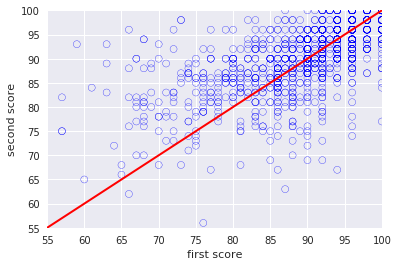

In [69]:
# Create scatter plot here.
x= np.array([scores_pairs_by_business.values[:,0][i][0] for i in range(len(scores_pairs_by_business.values))])
y= np.array([scores_pairs_by_business.values[:,0][i][1] for i in range(len(scores_pairs_by_business.values))])
plt.scatter(x, y, color='',marker='o',edgecolors='b')
plt.xlabel("first score")
plt.ylabel("second score")
plt.xlim(55, 100)
plt.ylim(55, 100)
x2=np.arange(55,100,0.01)
y2=x2
plt.plot(x2,y2,"red",linewidth=2)
plt.show()

### Question 7d

Another way to compare the scores from the two inspections is to examine the difference in scores. Subtract the first score from the second in `scores_pairs_by_business`. Make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

The histogram should look like this:

<img src="hist_2.png" width=400>

*Hint: Use `second_score` and `first_score` created in the scatter plot code above.*

*Hint: Convert the scores into numpy arrays to make them easier to deal with.*

*Hint: Try changing the number of bins when you call plt.hist.*

(array([   1.,    0.,    3.,    2.,    4.,    4.,    8.,    7.,   17.,
          15.,   34.,   66.,   90.,  135.,  218.,  151.,  115.,   63.,
          44.,   38.,   20.,   11.,    5.,    5.,    5.,    5.,    4.,
           3.,    0.,    2.,    1.]),
 array([-28, -26, -24, -22, -20, -18, -16, -14, -12, -10,  -8,  -6,  -4,
         -2,   0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,
         24,  26,  28,  30,  32,  34]),
 <a list of 31 Patch objects>)

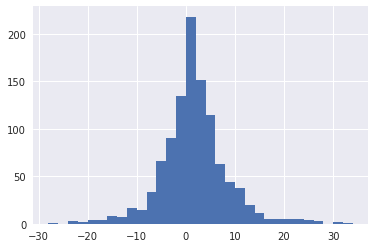

In [70]:
# Create histogram here
subtract = y-x
plt.hist(subtract,np.arange(-28,36,2))

### Question 7e

If a restaurant's score improves from the first to the second inspection, what do you expect to see in the scatter plot that you made in question 7c? What do you see?

If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in question 7d? What do you see?

In [71]:
q7c_answer = r"""
1. If a restaurant's score improves from the first to the second inspection, then the corresponding point in the scatter plot are above the reference line. And I see more restaurants' scores improve from the first to the second inspection.

2. If a restaurant's score improves from the first to the second inspection, then the corresponding number will be added to the bar at the right side of 0. And I see more restaurants' scores improve from the first to the second inspection and restaurants that get worse scores are mostly at the left neighborhood of 0.
"""
print(q7c_answer)


1. If a restaurant's score improves from the first to the second inspection, then the corresponding point in the scatter plot are above the reference line. And I see more restaurants' scores improve from the first to the second inspection.

2. If a restaurant's score improves from the first to the second inspection, then the corresponding number will be added to the bar at the right side of 0. And I see more restaurants' scores improve from the first to the second inspection and restaurants that get worse scores are mostly at the left neighborhood of 0.



## Summary of the Inspections Data

What we have learned about the inspections data? What might be some next steps in our investigation? 

* We found that the records are at the inspection level and that we have inspections for multiple years.   
* We also found that many restaurants have more than one inspection a year. 
* By joining the business and inspection data, we identified the name of the restaurant with the worst rating and optionally the names of the restaurants with the best rating.
* We identified the restaurants that have had the largest swing in rating over time.
* We also examined the relationship between the scores when a restaurant has multiple inspections in a year. Our findings were a bit counterintuitive and may warrant further investigation. 


## Congrats !

Congrats! You are finished with HW1.

## Submission

You're done!

Before submitting this assignment, ensure to:

1. Restart the Kernel (in the menubar, select Kernel->Restart & Run All)
2. Validate the notebook by clicking the "Validate" button

Finally, make sure to **submit** the assignment via the Assignments tab in Datahub